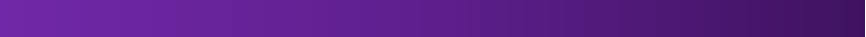

## Text Processessing

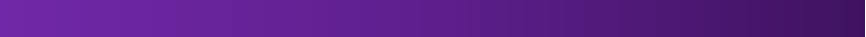

##I- Exploration EDA
---

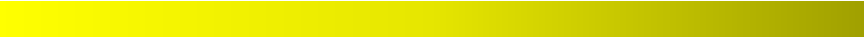

### Importation des modèles pour les étapes de preprocessing
---

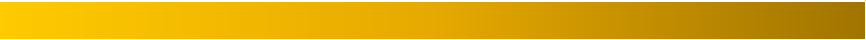

In [ ]:
import re
import string
import nltk
nltk.download('movie_reviews')   #: Le contenu qu'on va utiliser
nltk.download("wordnet")         #: utile pour lemmatisation
nltk.download('stopwords')       #: utile pour supprimer les stopwords
nltk.download('punkt')           #: utile pour tokenisation

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Voir les documents dans le contenu de movie_reviews*
---

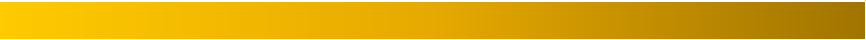

> * Le corpus de critiques de films contient des critiques de films, étiquetées comme positives ou négatives.

> * Le corpus movie_reviews de NLTK est divisé en deux sous-corpus principaux, "pos" (positif) et "neg" (négatif). Chaque sous-corpus contient des fichiers individuels représentant des critiques de films classées comme positives ou négatives. Les noms de fichier suivent généralement une convention où le premier caractère du nom de fichier indique la classe (p pour positif, n pour négatif), suivi d'un identifiant unique.

In [ ]:
from nltk.corpus import movie_reviews

# Liste des documents positifs
positive_docs = movie_reviews.fileids('pos')
print("Exemples de documents positifs:")
print(positive_docs[:5])

# Liste des documents négatifs
negative_docs = movie_reviews.fileids('neg')
print("\nExemples de documents négatifs:")
print(negative_docs[:5])

Exemples de documents positifs:
['pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt', 'pos/cv003_11664.txt', 'pos/cv004_11636.txt']

Exemples de documents négatifs:
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt']


###  Charger les documents positifs et négatifs puis choisir un document positif et un document négatif
---

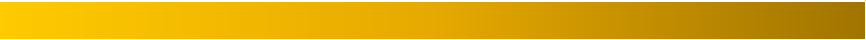

In [ ]:
positive_docs = movie_reviews.fileids('pos')
negative_docs = movie_reviews.fileids('neg')

doc_id_pos = positive_docs[0]
doc_id_neg = negative_docs[0]

positive_document = movie_reviews.raw(doc_id_pos)
negative_document = movie_reviews.raw(doc_id_neg)

---
---
---


###  Afficher les documents positifs et négatifs pour savoir leur contenu
---

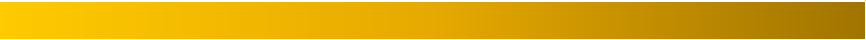

In [ ]:
positive_document

'films adapted from comic books have had plenty of success , whether they\'re about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there\'s never really been a comic book like from hell before . \nfor starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid \'80s with a 12-part series called the watchmen . \nto say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . \nthe book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . \nin other words , don\'t dismiss this film because of its source . \nif you can get past the whole comic book thing , you might find another stumbling block in from hell\'s directors , albert and allen hughes . \ngetting the hughes brothers to direct this seem

In [ ]:
negative_document

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

---
---
---


###  II- Prétraitement/Text Preprocessing
---

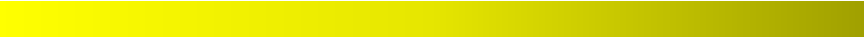

---
> On va commencer par faire le traitement sur les premiers documents, ensuite on va créer une fonction qui regroupe tous le processuss /pipline et l'appliquer sur tous les documents.
---

#### **1-Positive Document**

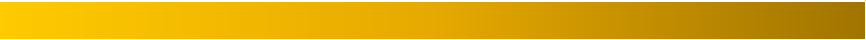

---
> on commence par les opérations de minisucule ,eliminer les caracteres spéciaux et les chiffreset la tokenisation
---

In [ ]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Removing special characters and digits
    text = re.sub(r'[^a-zA-Z\s\']', '', text)  # Including apostrophes for words like "don't"
    # Tokenization
    words = word_tokenize(text)
    return words

In [ ]:
positive_process_doc1 = preprocess_text(positive_document)
positive_process_doc1

['films',
 'adapted',
 'from',
 'comic',
 'books',
 'have',
 'had',
 'plenty',
 'of',
 'success',
 'whether',
 'they',
 "'re",
 'about',
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'or',
 'geared',
 'toward',
 'kids',
 'casper',
 'or',
 'the',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 'but',
 'there',
 "'s",
 'never',
 'really',
 'been',
 'a',
 'comic',
 'book',
 'like',
 'from',
 'hell',
 'before',
 'for',
 'starters',
 'it',
 'was',
 'created',
 'by',
 'alan',
 'moore',
 'and',
 'eddie',
 'campbell',
 'who',
 'brought',
 'the',
 'medium',
 'to',
 'a',
 'whole',
 'new',
 'level',
 'in',
 'the',
 'mid',
 "'s",
 'with',
 'a',
 'part',
 'series',
 'called',
 'the',
 'watchmen',
 'to',
 'say',
 'moore',
 'and',
 'campbell',
 'thoroughly',
 'researched',
 'the',
 'subject',
 'of',
 'jack',
 'the',
 'ripper',
 'would',
 'be',
 'like',
 'saying',
 'michael',
 'jackson',
 'is',
 'starting',
 'to',
 'look',
 'a',
 'little',
 'odd',
 'the',
 'book',
 'or',
 'graphic',
 'novel',
 'if',


In [ ]:
len(positive_process_doc1)

703

 > On remarque que le document est storé dans une liste qui contient des tokens en miniscule et le len de cette liste est 703

In [ ]:
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

In [ ]:
positive_process_doc1 = remove_stopwords(positive_process_doc1)
positive_process_doc1

['films',
 'adapted',
 'comic',
 'books',
 'plenty',
 'success',
 'whether',
 "'re",
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'geared',
 'toward',
 'kids',
 'casper',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 "'s",
 'never',
 'really',
 'comic',
 'book',
 'like',
 'hell',
 'starters',
 'created',
 'alan',
 'moore',
 'eddie',
 'campbell',
 'brought',
 'medium',
 'whole',
 'new',
 'level',
 'mid',
 "'s",
 'part',
 'series',
 'called',
 'watchmen',
 'say',
 'moore',
 'campbell',
 'thoroughly',
 'researched',
 'subject',
 'jack',
 'ripper',
 'would',
 'like',
 'saying',
 'michael',
 'jackson',
 'starting',
 'look',
 'little',
 'odd',
 'book',
 'graphic',
 'novel',
 'pages',
 'long',
 'includes',
 'nearly',
 'consist',
 'nothing',
 'footnotes',
 'words',
 "n't",
 'dismiss',
 'film',
 'source',
 'get',
 'past',
 'whole',
 'comic',
 'book',
 'thing',
 'might',
 'find',
 'another',
 'stumbling',
 'block',
 'hell',
 "'s",
 'directors',
 'albert',
 'allen',
 'hughes',
 'getting',
 'h

In [ ]:
len(positive_process_doc1)

417

> maintenant apres suppression des stop words le len a devenu 417

In [ ]:
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return lemmatized_words

In [ ]:
positive_process_doc1 = lemmatize_words(positive_process_doc1)
positive_process_doc1

['film',
 'adapted',
 'comic',
 'book',
 'plenty',
 'success',
 'whether',
 "'re",
 'superheroes',
 'batman',
 'superman',
 'spawn',
 'geared',
 'toward',
 'kid',
 'casper',
 'arthouse',
 'crowd',
 'ghost',
 'world',
 "'s",
 'never',
 'really',
 'comic',
 'book',
 'like',
 'hell',
 'starter',
 'created',
 'alan',
 'moore',
 'eddie',
 'campbell',
 'brought',
 'medium',
 'whole',
 'new',
 'level',
 'mid',
 "'s",
 'part',
 'series',
 'called',
 'watchman',
 'say',
 'moore',
 'campbell',
 'thoroughly',
 'researched',
 'subject',
 'jack',
 'ripper',
 'would',
 'like',
 'saying',
 'michael',
 'jackson',
 'starting',
 'look',
 'little',
 'odd',
 'book',
 'graphic',
 'novel',
 'page',
 'long',
 'includes',
 'nearly',
 'consist',
 'nothing',
 'footnote',
 'word',
 "n't",
 'dismiss',
 'film',
 'source',
 'get',
 'past',
 'whole',
 'comic',
 'book',
 'thing',
 'might',
 'find',
 'another',
 'stumbling',
 'block',
 'hell',
 "'s",
 'director',
 'albert',
 'allen',
 'hughes',
 'getting',
 'hughes',


In [ ]:
len(positive_process_doc1)

417

> Alors que la limatization n'affecte pas le len , elle transforme seulement les mots

In [ ]:
print("Original Text:")
print(positive_document)
print("\nPreprocessed Text:")
print(" ".join(positive_process_doc1))

Original Text:
films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this s

---
---
Selon le résultat de prétraitement , on remarque qu'on peut envisager des opérations suivantes:
> ***Suppression des Caractères uniques :***

>Il semble y avoir des caractères uniques résultant de la tokenization. on veut  supprimer ces caractères qui ne sont pas liés à des mots significatifs.
---
---

In [ ]:
# Suppression des caractères uniques
positive_process_doc1 = [word for word in positive_process_doc1 if len(word) > 1]

---
---
> ***Suppression des Caractères de Ponctuation en Trop :***

>Il ya des caractères de ponctuation en trop dans certaines parties du texte. on peut ajuster la régularisation pour les gérer correctement.
---
---

In [ ]:
# Suppression des caractères de ponctuation en trop
positive_process_doc1 = [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in positive_process_doc1]

---
---
> ***Gestion des Négations :***

>Bien que le texte ait été bien prétraité, il pourrait être utile de gérer les négations de manière plus explicite. Par exemple, convertir "n't" en "not" pour améliorer la lisibilité.
---
---

In [ ]:
# Gestion des négations
positive_process_doc1 = [word.replace("n't", "not") for word in positive_process_doc1]

---
---
> ***Suppression des Mots Trop Courts :***

>On envisage de supprimer les mots trop courts qui pourraient ne pas ajouter beaucoup de valeur à l'analyse.
---
---

In [ ]:
# Suppression des mots trop courts
positive_process_doc1 = [word for word in positive_process_doc1 if len(word) > 2]

In [ ]:
# Affichage du texte prétraité
print("Preprocessed Text:")
print(" ".join(positive_process_doc1))

Preprocessed Text:
film adapted comic book plenty success whether superheroes batman superman spawn geared toward kid casper arthouse crowd ghost world never really comic book like hell starter created alan moore eddie campbell brought medium whole new level mid part series called watchman say moore campbell thoroughly researched subject jack ripper would like saying michael jackson starting look little odd book graphic novel page long includes nearly consist nothing footnote word dismiss film source get past whole comic book thing might find another stumbling block hell director albert allen hughes getting hughes brother direct seems almost ludicrous casting carrot top well anything riddle better direct film set ghetto feature really violent street crime mad genius behind menace society ghetto question course whitechapel london east end filthy sooty place whore called unfortunate starting get little nervous mysterious psychopath carving profession surgical precision first stiff turn c

#### **2-Negative Document**

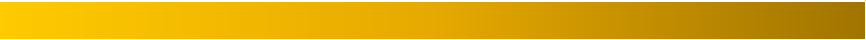

> On va répéter le même processuss sur le document négative et voir le résultats de prétraitement

In [ ]:
negative_process_doc1 = preprocess_text(negative_document)
negative_process_doc1

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'to',
 'a',
 'church',
 'party',
 'drink',
 'and',
 'then',
 'drive',
 'they',
 'get',
 'into',
 'an',
 'accident',
 'one',
 'of',
 'the',
 'guys',
 'dies',
 'but',
 'his',
 'girlfriend',
 'continues',
 'to',
 'see',
 'him',
 'in',
 'her',
 'life',
 'and',
 'has',
 'nightmares',
 'what',
 "'s",
 'the',
 'deal',
 'watch',
 'the',
 'movie',
 'and',
 'sorta',
 'find',
 'out',
 'critique',
 'a',
 'mindfuck',
 'movie',
 'for',
 'the',
 'teen',
 'generation',
 'that',
 'touches',
 'on',
 'a',
 'very',
 'cool',
 'idea',
 'but',
 'presents',
 'it',
 'in',
 'a',
 'very',
 'bad',
 'package',
 'which',
 'is',
 'what',
 'makes',
 'this',
 'review',
 'an',
 'even',
 'harder',
 'one',
 'to',
 'write',
 'since',
 'i',
 'generally',
 'applaud',
 'films',
 'which',
 'attempt',
 'to',
 'break',
 'the',
 'mold',
 'mess',
 'with',
 'your',
 'head',
 'and',
 'such',
 'lost',
 'highway',
 'memento',
 'but',
 'there',
 'are',
 'good',
 'and',
 'bad',
 'ways',
 'o

In [ ]:
len(negative_process_doc1)

704

In [ ]:
negative_process_doc1 = remove_stopwords(negative_process_doc1)
negative_process_doc1

['plot',
 'two',
 'teen',
 'couples',
 'go',
 'church',
 'party',
 'drink',
 'drive',
 'get',
 'accident',
 'one',
 'guys',
 'dies',
 'girlfriend',
 'continues',
 'see',
 'life',
 'nightmares',
 "'s",
 'deal',
 'watch',
 'movie',
 'sorta',
 'find',
 'critique',
 'mindfuck',
 'movie',
 'teen',
 'generation',
 'touches',
 'cool',
 'idea',
 'presents',
 'bad',
 'package',
 'makes',
 'review',
 'even',
 'harder',
 'one',
 'write',
 'since',
 'generally',
 'applaud',
 'films',
 'attempt',
 'break',
 'mold',
 'mess',
 'head',
 'lost',
 'highway',
 'memento',
 'good',
 'bad',
 'ways',
 'making',
 'types',
 'films',
 'folks',
 "n't",
 'snag',
 'one',
 'correctly',
 'seem',
 'taken',
 'pretty',
 'neat',
 'concept',
 'executed',
 'terribly',
 'problems',
 'movie',
 'well',
 'main',
 'problem',
 "'s",
 'simply',
 'jumbled',
 'starts',
 'normal',
 'downshifts',
 'fantasy',
 'world',
 'audience',
 'member',
 'idea',
 "'s",
 'going',
 'dreams',
 'characters',
 'coming',
 'back',
 'dead',
 'others',


In [ ]:
negative_process_doc1 = lemmatize_words(negative_process_doc1)
negative_process_doc1

['plot',
 'two',
 'teen',
 'couple',
 'go',
 'church',
 'party',
 'drink',
 'drive',
 'get',
 'accident',
 'one',
 'guy',
 'dy',
 'girlfriend',
 'continues',
 'see',
 'life',
 'nightmare',
 "'s",
 'deal',
 'watch',
 'movie',
 'sorta',
 'find',
 'critique',
 'mindfuck',
 'movie',
 'teen',
 'generation',
 'touch',
 'cool',
 'idea',
 'present',
 'bad',
 'package',
 'make',
 'review',
 'even',
 'harder',
 'one',
 'write',
 'since',
 'generally',
 'applaud',
 'film',
 'attempt',
 'break',
 'mold',
 'mess',
 'head',
 'lost',
 'highway',
 'memento',
 'good',
 'bad',
 'way',
 'making',
 'type',
 'film',
 'folk',
 "n't",
 'snag',
 'one',
 'correctly',
 'seem',
 'taken',
 'pretty',
 'neat',
 'concept',
 'executed',
 'terribly',
 'problem',
 'movie',
 'well',
 'main',
 'problem',
 "'s",
 'simply',
 'jumbled',
 'start',
 'normal',
 'downshift',
 'fantasy',
 'world',
 'audience',
 'member',
 'idea',
 "'s",
 'going',
 'dream',
 'character',
 'coming',
 'back',
 'dead',
 'others',
 'look',
 'like',
 

In [ ]:
len(negative_process_doc1)

337

In [ ]:
print("Original Text:")
print(negative_document)
print("\nPreprocessed Text:")
print(" ".join(negative_process_doc1))

Original Text:
plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience memb

In [ ]:
# Suppression des caractères uniques
negative_process_doc1 = [word for word in negative_process_doc1 if len(word) > 1]

In [ ]:
# Suppression des caractères de ponctuation en trop
negative_process_doc1 = [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in negative_process_doc1]

In [ ]:
# Gestion des négations
negative_process_doc1 = [word.replace("n't", "not") for word in negative_process_doc1]

In [ ]:
# Suppression des mots trop courts
negative_process_doc1 = [word for word in negative_process_doc1 if len(word) > 2]

In [ ]:
# Affichage du texte prétraité
print("Preprocessed Text:")
print(" ".join(negative_process_doc1))

Preprocessed Text:
plot two teen couple church party drink drive get accident one guy girlfriend continues see life nightmare deal watch movie sorta find critique mindfuck movie teen generation touch cool idea present bad package make review even harder one write since generally applaud film attempt break mold mess head lost highway memento good bad way making type film folk snag one correctly seem taken pretty neat concept executed terribly problem movie well main problem simply jumbled start normal downshift fantasy world audience member idea going dream character coming back dead others look like dead strange apparition disappearance looooot chase scene ton weird thing happen simply explained personally mind trying unravel film every give clue get kind fed film biggest problem obviously got big secret hide seems want hide completely final five minute make thing entertaining thrilling even engaging meantime really sad part arrow dig flick like actually figured halfway point strangene

>Maintenant on va créer une fonction qui fait tous ces étapes:

In [ ]:
def NLP_Pipeline(text):
    # Lowercasing
    text = text.lower()
    # Removing special characters and digits
    text = re.sub(r'[^a-zA-Z\s\']', '', text)  # Including apostrophes for words like "don't"
    # Tokenization
    words = word_tokenize(text)

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Additional processing steps
    words = [word for word in words if len(word) > 1]
    words = [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in words]
    words = [word.replace("n't", "not") for word in words]
    words = [word for word in words if len(word) > 2]

    # Return preprocessed text
    return " ".join(words)

In [ ]:
NLP_Pipeline(negative_document)

'plot two teen couple church party drink drive get accident one guy girlfriend continues see life nightmare deal watch movie sorta find critique mindfuck movie teen generation touch cool idea present bad package make review even harder one write since generally applaud film attempt break mold mess head lost highway memento good bad way making type film folk snag one correctly seem taken pretty neat concept executed terribly problem movie well main problem simply jumbled start normal downshift fantasy world audience member idea going dream character coming back dead others look like dead strange apparition disappearance looooot chase scene ton weird thing happen simply explained personally mind trying unravel film every give clue get kind fed film biggest problem obviously got big secret hide seems want hide completely final five minute make thing entertaining thrilling even engaging meantime really sad part arrow dig flick like actually figured halfway point strangeness start make litt

In [ ]:
NLP_Pipeline(positive_document)

'film adapted comic book plenty success whether superheroes batman superman spawn geared toward kid casper arthouse crowd ghost world never really comic book like hell starter created alan moore eddie campbell brought medium whole new level mid part series called watchman say moore campbell thoroughly researched subject jack ripper would like saying michael jackson starting look little odd book graphic novel page long includes nearly consist nothing footnote word dismiss film source get past whole comic book thing might find another stumbling block hell director albert allen hughes getting hughes brother direct seems almost ludicrous casting carrot top well anything riddle better direct film set ghetto feature really violent street crime mad genius behind menace society ghetto question course whitechapel london east end filthy sooty place whore called unfortunate starting get little nervous mysterious psychopath carving profession surgical precision first stiff turn copper peter godley

---
---
---


###  III-Extraction des entitées:
---

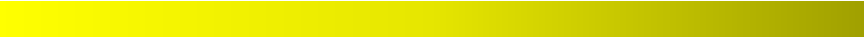

---
---
> ***Considérations sur les Mots Clés :***

>Notre objectif est l'analyse de sentiment,on veut également  extraire des mots clés ou des entités importantes pour représenter le contenu de manière plus compacte.
---
---

> Pour extraire des mots-clés en utilisant différentes techniques, nous allons utiliser les bibliothèques scikit-learn pour TfidfVectorizer et CountVectorizer et la bibliothèque spaCy pour l'extraction d'entités nommées (NER).

In [ ]:
!pip install scikit-learn gensim spacy
!python -m spacy download en

2023-11-15 02:00:12.841450: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-15 02:00:12.841517: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-15 02:00:12.841557: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 02:00:12.851195: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 02:00:14.265227: W tensorflow/compiler/

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import spacy

def extract_keywords_tfidf(text):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform([text])
    feature_names = vectorizer.get_feature_names_out()
    keyword_scores = [(feature_names[i], X[0, i]) for i in X.nonzero()[1]]
    keyword_scores.sort(key=lambda x: x[1], reverse=True)
    return keyword_scores[:10]

def extract_keywords_count(text):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform([text])
    feature_names = vectorizer.get_feature_names_out()
    keyword_scores = [(feature_names[i], X[0, i]) for i in X.nonzero()[1]]
    keyword_scores.sort(key=lambda x: x[1], reverse=True)
    return keyword_scores[:10]


def extract_keywords_ner(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities[:10]

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

preprocessed_positive = NLP_Pipeline(positive_document)
# Extract keywords using different techniques
tfidf_keywords = extract_keywords_tfidf(preprocessed_positive)
count_keywords = extract_keywords_count(preprocessed_positive)
ner_keywords = extract_keywords_ner(preprocessed_positive)

# Display keywords
print("TF-IDF Keywords:")
for keyword, score in tfidf_keywords:
    print(f"{keyword}: {score}")

print("\nCountVectorizer Keywords:")
for keyword, count in count_keywords:
    print(f"{keyword}: {count}")

print("\nNamed Entity Recognition Keywords:")
for keyword, entity_type in ner_keywords:
    print(f"{keyword} ({entity_type})")


TF-IDF Keywords:
film: 0.24806946917841693
hell: 0.20672455764868078
comic: 0.20672455764868078
say: 0.16537964611894462
like: 0.16537964611894462
book: 0.16537964611894462
even: 0.12403473458920847
ripper: 0.12403473458920847
campbell: 0.12403473458920847
moore: 0.12403473458920847

CountVectorizer Keywords:
film: 6
comic: 5
hell: 5
book: 4
like: 4
say: 4
moore: 3
campbell: 3
ripper: 3
even: 3

Named Entity Recognition Keywords:
superman spawn (PERSON)
alan moore eddie (PERSON)
jack ripper (PERSON)
michael jackson (PERSON)
albert allen (PERSON)
london (GPE)
first (ORDINAL)
peter godley (PERSON)
frederick abberline johnny depp (PERSON)
mary kelly (PERSON)


###  IV- Visualisations:
---

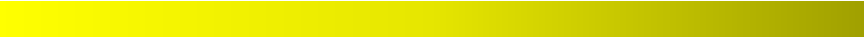

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
preprocessed_positive = NLP_Pipeline(positive_document)
preprocessed_negative = NLP_Pipeline(negative_document)

> * **Le nuage de mots**

In [ ]:
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='black').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

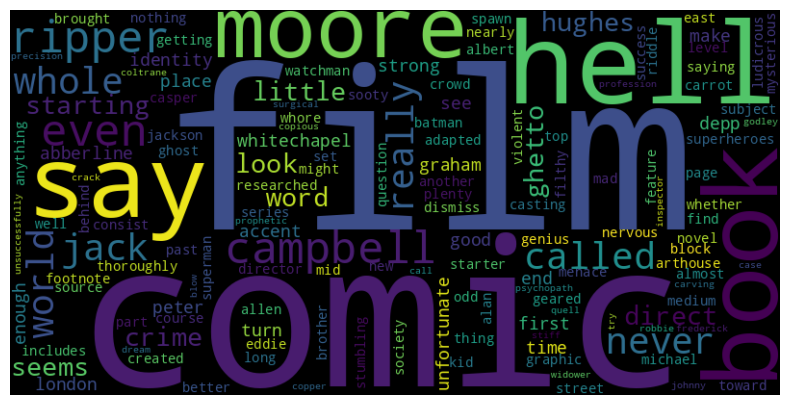

In [ ]:
generate_wordcloud(preprocessed_positive)

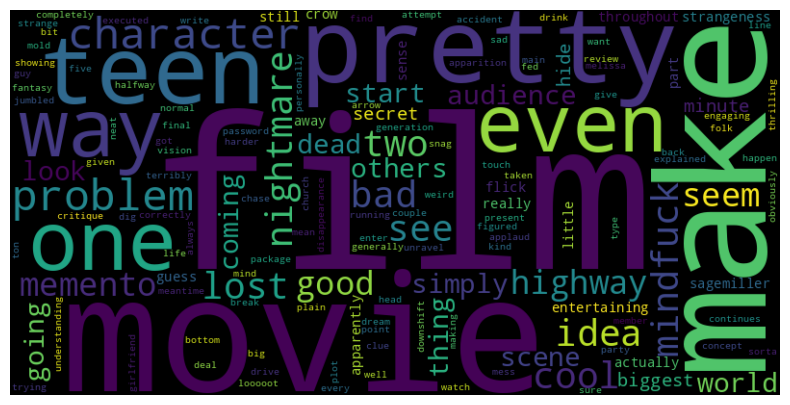

In [ ]:
generate_wordcloud(preprocessed_negative)

> * **histogramme de fréquences des mots**

In [ ]:
def plot_word_frequency(words, title):
    plt.figure(figsize=(10, 9))
    sns.histplot(words, bins=50, kde=False, color='purple')
    plt.title(title)
    plt.xlabel('Mots')
    plt.ylabel('Fréquence')
    plt.show()

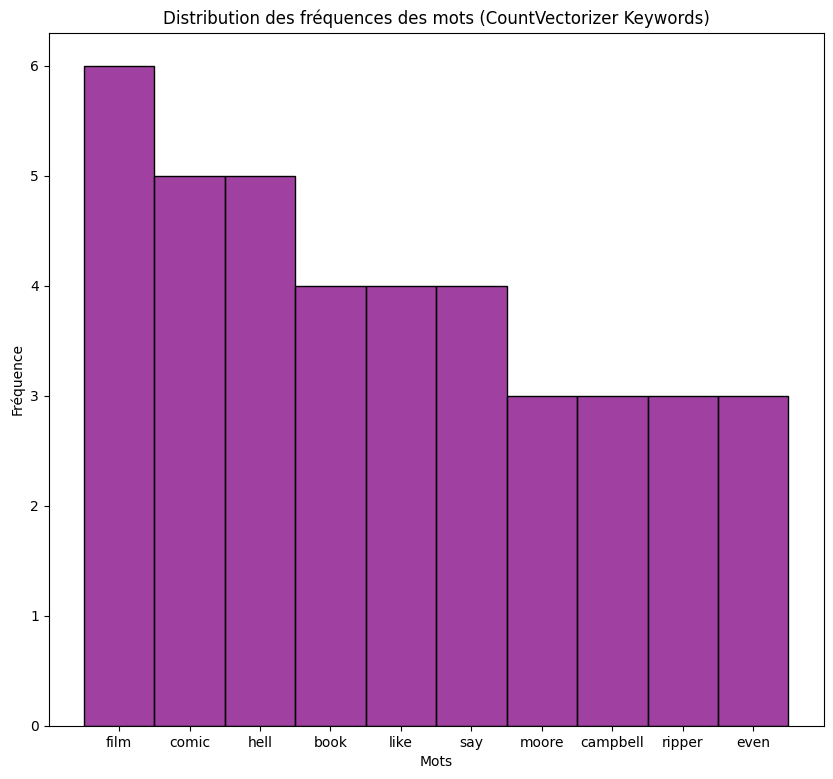

In [ ]:
# Mots et leurs fréquences spécifiques
countvectorizer_keywords = {
    'film': 6,
    'comic': 5,
    'hell': 5,
    'book': 4,
    'like': 4,
    'say': 4,
    'moore': 3,
    'campbell': 3,
    'ripper': 3,
    'even': 3
}

countvectorizer_words = []
for word, frequency in countvectorizer_keywords.items():
    countvectorizer_words.extend([word] * frequency)
plot_word_frequency(countvectorizer_words, 'Distribution des fréquences des mots (CountVectorizer Keywords)')

> * **diagramme à barres pour les 10 premiers mots-clés**

In [ ]:
def plot_top_keywords(keywords, title):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=[score for _, score in keywords], y=[keyword for keyword, _ in keywords], color='purple')
    plt.title(title)
    plt.xlabel('Score')
    plt.ylabel('Mots-clés')
    plt.show()

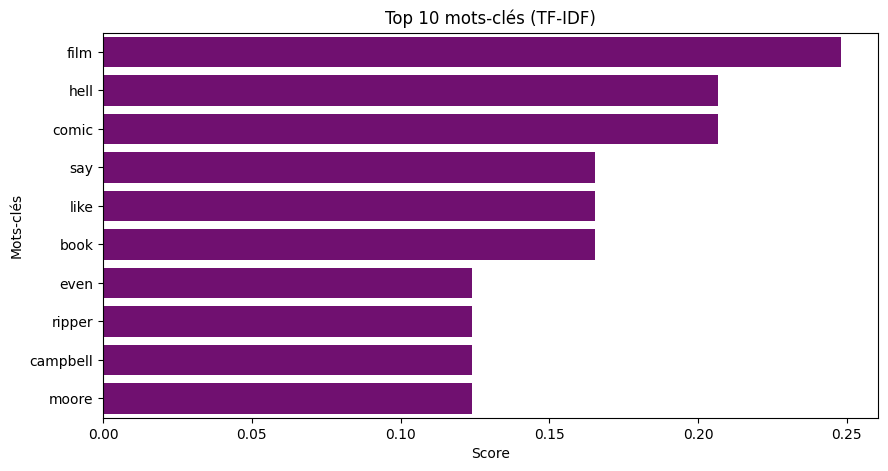

In [ ]:
plot_top_keywords(tfidf_keywords, 'Top 10 mots-clés (TF-IDF)')

###  V- Généralisation:
---

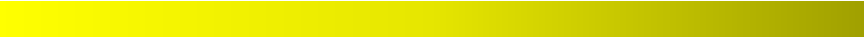

#####  Charger tous l'ensemble de données

In [ ]:
# Récupérer les identifiants de tous les documents positifs et négatifs
positive_docs = movie_reviews.fileids('pos')
negative_docs = movie_reviews.fileids('neg')

# Initialiser des listes pour stocker les documents prétraités
positive_reviews = []
negative_reviews = []

# Parcourir tous les documents positifs
for doc_id_pos in positive_docs:
    positive_document = movie_reviews.raw(doc_id_pos)
    # Appliquer votre traitement NLP_Pipeline
    preprocessed_positive = NLP_Pipeline(positive_document)
    positive_reviews.append(preprocessed_positive)

# Parcourir tous les documents négatifs
for doc_id_neg in negative_docs:
    negative_document = movie_reviews.raw(doc_id_neg)
    # Appliquer traitement NLP_Pipeline
    preprocessed_negative = NLP_Pipeline(negative_document)
    negative_reviews.append(preprocessed_negative)

In [ ]:
for i, text in enumerate(positive_reviews):
    preprocessed_text = NLP_Pipeline(text)
    keyword_scores = extract_keywords_tfidf(preprocessed_text)

    print(f"Positive Document {i+1}:")
    print("Preprocessed Text:", preprocessed_text)
    print("Top 10 Keywords (TF-IDF):", keyword_scores)

    generate_wordcloud(preprocessed_text)

In [ ]:
# Appliquer le pipeline NLP et générer des nuages de mots pour les documents négatifs
for i, text in enumerate(negative_reviews):
    preprocessed_text = NLP_Pipeline(text)
    keyword_scores = extract_keywords_tfidf(preprocessed_text)
    print(f"Negative Document {i+1}:")
    print("Preprocessed Text:", preprocessed_text)
    print("Top 10 Keywords (TF-IDF):", keyword_scores)
    generate_wordcloud(preprocessed_text)